<a href="https://colab.research.google.com/github/tomonari-masada/course-nlp2020/blob/master/11_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Ê®ôÊ∫ñ‰ΩøÁî®„É©„Ç§„Éñ„É©„É™„Éº
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc
import os
import shutil
from icecream import ic
from tqdm import tqdm_notebook as tqdm 

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ËøΩË®ò
import json
import datetime
import math
plt.style.use('dark_background')

# debug
#%pdb on

import pixiedust #%pixie_debugger

# tf„Åå„Ç®„É©„Éº„ÅØ„Åã„Å™„ÅÑ„Åü„ÇÅ
# tf„Åå„Ç®„É©„Éº„ÅØ„Åã„Å™„ÅÑ„Åü„ÇÅ
#import tensorflow as tf
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="5"
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [4]:
import pandas as pd
import re
import emoji
from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv("./result0605.csv", engine='python')

type(df["description"])
docs = df["description"].to_list()

In [5]:
print(len(docs))

93794


In [6]:
print(docs[0][:1000])

Êº´Áîª„ÄÅ„Ç¢„Éã„É°„ÄÅÂ£∞ÂÑ™Âû¢„ÄÇ RTÂ§ö„ÇÅÊ∞ó„Åæ„Åæ„Å´Âëü„Åç„Åæ„Åô„ÄÇ‰ºèÁ∑öÁ≥ª„ÅÆÊº´ÁîªÂ•Ω„Åç„ÄÇÂè§Â∑ùÊÖé„Åï„Çì„ÉªÂ∞èÊûóË£ï‰ªã„Åï„Çì„ÉªÊ≤≥Ë•øÂÅ•Âêæ„Åï„Çì „ÉªÁî∞‰∏∏ÁØ§Âøó„Åï„ÇìÊé®„Åó


### Neologd„Çí‰Ωø„Å£„Å¶tokenize„Åô„Çã

In [7]:
docs

['Êº´Áîª„ÄÅ„Ç¢„Éã„É°„ÄÅÂ£∞ÂÑ™Âû¢„ÄÇ RTÂ§ö„ÇÅÊ∞ó„Åæ„Åæ„Å´Âëü„Åç„Åæ„Åô„ÄÇ‰ºèÁ∑öÁ≥ª„ÅÆÊº´ÁîªÂ•Ω„Åç„ÄÇÂè§Â∑ùÊÖé„Åï„Çì„ÉªÂ∞èÊûóË£ï‰ªã„Åï„Çì„ÉªÊ≤≥Ë•øÂÅ•Âêæ„Åï„Çì „ÉªÁî∞‰∏∏ÁØ§Âøó„Åï„ÇìÊé®„Åó',
 'DÂû¢„ÄÇ„Éó„É™„É≥„Çª„Çπ„Çà„ÅèÊèè„ÅÑ„Å¶„Åë„Å©‚Ä¶„Åü„Åæ„Å´ÈÅï„ÅÜ„ÇÇ„ÅÆ„ÇÇÊèè„Åç„Åæ„Åô„ÄÇÊâãÈÅÖ„ÇÅ„Åß„Åô„Åå„Çà„Çç„Åó„Åè„ÅäÈ°ò„ÅÑ„Åó„Åæ„Åôüôáüôá ‚ÄªÂêçÂâç„ÅÆË™≠„ÅøÊñπ„ÅØËá™Áî±„Å™„Çì„ÅßÂ•Ω„Åç„Å™„Çà„ÅÜ„Å´Ë™≠„Çì„Åß„Åè„Å†„Åï„ÅÑ ÊúÄËøë„ÅØ‰ΩéÊµÆ‰∏ä„Å™„ÅÆ„Åß‚Ä¶Âà•„ÅÆÁµµÂû¢ ‚Üí@ri_ri_ri_ri_on',
 'ùñíùñîùñîùñìùñéùñÜùñì ‚ô§  ùî£ùî±ùî¶ùî∞ùî©ùîûùî´ùî°  ‚ô¢ ùñíùñéùñûùñÜùñõùñé  ‚ôß  ùî•ùî¨ùî¶ùî∑ùî¢ùîØ  ‚ô°  ùñáùñáùñü  ‚ú©  ùî™ùî¢ùî©ùî©ùî¨ùî¥ùî™ùî¨ùî±ùî¶ùî£\nÀóÀèÀã‚ãÜ¬∑Àö ‡ºò * „Ç¢„É©„É©„Ç´„Çø„Éñ„É©„ÉÑ„É´„É™„É≥„Ç≥ÔΩ´„Ç©„Ç©„Ç™!!‚ú©‚Äß‚ÇäÀö¬¥ÀéÀó.',
 'ENHYPEN„ÄÅ„Ç¢„Éã„É°„ÉªÊº´Áîª „Ç≤„Éº„É†Èñ¢ÈÄ£„ÅßTwitter‰Ωø„Å£„Å¶„Çã„ÅÆ„Åß„ÄÅ„Åù„Çå‰ª•Â§ñ„ÅØÁÑ°ÂèçÂøú„Åß„Åô„ÄÅ„ÄÅ',
 '„ÄêÂøÉ„Å´„ÇÜ„Å®„Çä„Å®ÊΩ§„ÅÑ„Çíüíû„ÄëÁõÆÊåá„Åô„ÅÆ„ÅØÂ≠¶Ê†°„ÅÆ‰øùÂÅ•ÂÆ§„ÅÆ„Çà„ÅÜ„Å™Â†¥ÊâÄ„Éª„Éõ„ÉÉ„Å®‰∏ÄÊÅØ„Å§„Åë„ÇãÂ†

In [8]:
import subprocess
cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path_neologd = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')
import MeCab
m=MeCab.Tagger("-Ochasen -d "+str(path_neologd))


def neolog_prep_text( text):
  return_words = []
  splited_text = (re.split('[\t,]', line) for line in m.parse(text).split('\n'))
  for tmp_word in splited_text :
    if (tmp_word[0] in ('EOS', '', 't', '„Éº') ):
       continue 
    if not re.match( 'ÂêçË©û' ,tmp_word[3]  ) or tmp_word[0] in emoji.UNICODE_EMOJI["en"]:
      continue
    else:
      return_words.append(tmp_word[0])

  return return_words

* tokenization„ÅÆÂÆüË°å

In [11]:
from tqdm import tqdm

new_docs = list()
for doc in tqdm(docs):
  if str(doc) == "nan":
    continue
  tmp_words =  neolog_prep_text(str(doc))
  new_docs.append( tmp_words )
  

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 93794/93794 [00:23<00:00, 4048.87it/s]


* tokenization„ÅÆÁµêÊûú„ÇíÁ¢∫Ë™ç

In [12]:
print(new_docs[5])

['ÈÅéÂéª', '„Ç∏„É£„Éë„É™„Ç´„Éº„Éà', 'ÂãïÁîª', 'TSUMURI', 'KART', 'VRChat', '„ÉØ„É™„Çπ„Éé', 'MK', '8', 'DX', '‰∏Ä‰Ωç', '„Çä„Åó', '„Åü‰∫∫', 'Á§æ‰ºö', 'Âá∫„Å¶', 'ÈÖç‰ø°', 'https', 'co', 'FJoitl', '8', 'JHE', '„Éò„ÉÉ„ÉÄ', 'Áå´', 'È£º„ÅÑ‰∏ª', 'smmmmm']


* ÂêÑÊñáÊõ∏„ÇíÈï∑„ÅÑÊñáÂ≠óÂàó„ÅßË°®„Åó„Å™„Åä„ÅôÔºàCountVectorizer„ÇíÂæå„Åß‰Ωø„ÅÜ„Åü„ÇÅÔºâ

In [13]:
corpus = [' '.join(doc) for doc in new_docs]

In [14]:
new_docs

[['Êº´Áîª',
  '„Ç¢„Éã„É°',
  'Â£∞ÂÑ™',
  'Âû¢',
  'RT',
  'Â§ö„ÇÅ',
  'Ê∞ó„Åæ„Åæ',
  '‰ºèÁ∑ö',
  'Á≥ª',
  'Êº´Áîª',
  'Â•Ω„Åç',
  'Âè§Â∑ùÊÖé',
  '„Åï„Çì',
  'Â∞èÊûóË£ï‰ªã',
  '„Åï„Çì',
  'Ê≤≥Ë•øÂÅ•Âêæ',
  '„Åï„Çì',
  'Áî∞‰∏∏ÁØ§Âøó',
  '„Åï„Çì'],
 ['D',
  'Âû¢',
  '„Éó„É™„É≥„Çª„Çπ',
  '„Åü„Åæ',
  '„ÇÇ„ÅÆ',
  'ÊâãÈÅÖ',
  '„ÇÅ',
  '„Çà„Çç„Åó„Åè„ÅäÈ°ò„ÅÑ„Åó„Åæ„Åô',
  'ÂêçÂâç',
  'Ë™≠„ÅøÊñπ',
  'Ëá™Áî±',
  'Â•Ω„Åç',
  '„Çà„ÅÜ',
  'ÊúÄËøë',
  'ÊµÆ‰∏ä',
  'Âà•',
  'Áµµ',
  'Âû¢',
  'ri',
  'ri',
  'ri',
  'ri',
  'on'],
 ['„Ç¢„É©„É©„Ç´„Çø„Éñ„É©„ÉÑ„É´„É™„É≥„Ç≥ÔΩ´„Ç©„Ç©„Ç™', '‚Çä'],
 ['ENHYPEN', '„Ç¢„Éã„É°', 'Êº´Áîª', '„Ç≤„Éº„É†', 'Èñ¢ÈÄ£', 'Twitter', '„Åù„Çå', '‰ª•Â§ñ', 'ÂèçÂøú'],
 ['ÂøÉ',
  '„ÇÜ„Å®„Çä',
  'ÊΩ§„ÅÑ',
  '„ÅÆ',
  'Â≠¶Ê†°',
  '‰øùÂÅ•ÂÆ§',
  '„Çà„ÅÜ',
  'Â†¥ÊâÄ',
  '‰∏ÄÊÅØ',
  'Â†¥ÊâÄ',
  '„ÅÇ„Å™„Åü',
  'Âπ∏„Åõ',
  'ËÅ∑Ê•≠',
  'Èü≥Ê•Ω',
  'Ë¨õÂ∏´',
  'Ëá™ÂàÜÁ£®„Åç',
  '‰∏≠',
  'Ëá™ÂàÜ',
  '„Åü„ÇÅ',
  '„ÉÑ„Ç§„Éº„Éà',
  '‰∫ã',
  '„Éâ„Ç∏',
  'Êúâ„Çä',
  '2',
  'Âåπ',
  '4',
  'Âåπ'],


## 11-02 „Éá„Éº„ÇøË°åÂàó„ÅÆ‰ΩúÊàê
* NMF„ÅÆÂ†¥Âêà„ÄÅTF-IDF„ÅßÂçòË™û„ÅÆÈáç„Åø„ÇíÊ±Ç„ÇÅ„Å¶ÂêÑÊñáÊõ∏„Çí„Éô„ÇØ„Éà„É´Âåñ„Åô„Çã„ÄÇ
* LDA„ÅÆÂ†¥Âêà„ÄÅÂçò„Å´ÂçòË™û„ÅÆÂá∫ÁèæÈ†ªÂ∫¶„ÇíÈáç„Åø„Å®„Åó„Å¶ÂêÑÊñáÊõ∏„Çí„Éô„ÇØ„Éà„É´Âåñ„Åô„Çã„ÄÇ

### sklearn„ÅÆCountVectorizer„ÅßÁñéË°åÂàóÂåñ„Åô„Çã

* ÂÖ®ÊñáÊõ∏„ÅÆÂçäÂàÜ„Çà„ÇäÂ§ö„ÅÑÊñáÊõ∏„Å´Áèæ„Çå„ÇãÂçòË™û„ÅØ„ÄÅÈ´òÈ†ªÂ∫¶Ë™û„Å®„Åø„Å™„Åó„Å¶ÂâäÈô§„Åô„Çã„ÄÇ
* 10‰ª∂Êú™Ê∫Ä„ÅÆÊñáÊõ∏„Å´„Åó„ÅãÁèæ„Çå„Å™„ÅÑÂçòË™û„ÅØ„ÄÅ‰ΩéÈ†ªÂ∫¶Ë™û„Å®„Åø„Å™„Åó„Å¶ÂâäÈô§„Åô„Çã„ÄÇ

In [18]:
import os
import urllib.request
def download_stopwords(path):
    url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
    if os.path.exists(path):
        print('File already exists.')
    else:
        print('Downloading...')
        # Download the file from `url` and save it locally under `file_name`:
        urllib.request.urlretrieve(url, path)

def create_stopwords(file_path):
    stop_words = []
    for w in open(path, "r"):
        w = w.replace('\n','')
        if len(w) > 0:
          stop_words.append(w)
    return stop_words    

path = "stop_words.txt"
download_stopwords(path)
stop_words = create_stopwords(path)

File already exists.


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.5, min_df=10, stop_words=stop_words)
X = vectorizer.fit_transform(corpus)

In [23]:
print(vectorizer.get_feature_names())

['00', '000', '001', '007', '009', '01', '0101', '011', '0120', '0129', '016', '02', '020', '021', '0221', '03', '04', '05', '0501', '06', '0626', '07', '08', '09', '090', '092', '0g', '0m', '0t', '0v', '0w', '0ÊôÇ', '0Ê≠≥', '10', '100', '1000', '10000', '1000‰∏á', '1000‰∫∫', '100„Éë„Éº„Çª„É≥„Éà', '100‰∏á', '100‰∏áÂÜÜ', '100‰∫∫', '100ÂÜÜ', '100Âùá', '100Âπ¥', '100Êú¨', '101', '1010', '1013', '1014', '1016', '1026', '104', '105', '106', '107', '108', '109', '10t', '10‰∏á', '10‰∏áÂÜÜ', '10‰ª£', '10ÂàÜ', '10Âë®Âπ¥', '10Âõû', '10Âπ¥', '10Âπ¥ÁõÆ', '10ÊôÇ', '10Êúà', '10Ê≠≥', '11', '110', '1100', '1102', '1106', '1111', '1115', '112', '1120', '1123', '1127', '113', '114', '114514', '115', '119', '11Âõû', '11Âπ¥', '11Âπ¥ÁõÆ', '11ÊôÇ', '11Êúà', '11Ê≠≥', '12', '120', '1200', '1203', '1205', '1208', '1220', '1224', '1226', '123', '1234', '124', '125', '127', '129', '12Âπ¥', '12Âπ¥ÁõÆ', '12ÊôÇ', '12Êúà', '12Ê≠≥', '13', '130', '1300', '139', '13Âπ¥', '13Âπ¥ÁõÆ', '13ÊôÇ', '13Ê≠≥', '14', '140', '147'

In [24]:
print(len(vectorizer.get_feature_names()))

13363


* ÊñáÊõ∏Êï∞„Å®Ë™ûÂΩô„Çµ„Ç§„Ç∫„ÇíÂ§âÊï∞„Å´„Çª„ÉÉ„Éà

In [26]:
n_samples, n_features = X.shape

### TF-IDF„ÅßÂêÑÊñáÊõ∏„Å´„Åä„Åë„ÇãÂçòË™û„ÅÆÈáç„Åø„ÇíË®àÁÆó„Åô„Çã

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
Xtfidf = tfidf.fit_transform(X)

In [28]:
print(Xtfidf[0])

  (0, 11047)	0.431803321010621
  (0, 10837)	0.33656875348588305
  (0, 9484)	0.5130933332785758
  (0, 9223)	0.13211295128074138
  (0, 9017)	0.23896590223193948
  (0, 8983)	0.25614707531784403
  (0, 8682)	0.4747756969099675
  (0, 4664)	0.1719552270462194
  (0, 2706)	0.20457804496538182


In [29]:
Xtfidf.shape

(88481, 13363)

* ÊäΩÂá∫„Åô„Çã„Éà„Éî„ÉÉ„ÇØ„ÅÆÂÄãÊï∞„ÅØ„ÄÅ‰ªäÂõû„ÅØ20ÂÄã„Å®„Åô„Çã„ÄÇ

In [30]:
n_components = 6

## 11-03 NMF„Åß„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫
* „Åæ„Åö„ÄÅTF-IDF„ÅÆ„Éá„Éº„ÇøË°åÂàó„Çí‰Ωø„Å£„Å¶„ÄÄNMF„Å´„Çà„Å£„Å¶„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫„ÇíË©¶„Åø„Çã„ÄÇ
 * NMF„ÅÆ„Éë„É©„É°„Éº„ÇøÁæ§„ÅØ‰∏ãË®ò„Çµ„É≥„Éó„É´„Ç≥„Éº„Éâ„ÅÆ„Åæ„Åæ„ÄÇ
 * https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

### NMF„Å®LDA„ÅÆ„Ç§„É≥„Éù„Éº„Éà

In [31]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

### NMF„Å´„Çà„Çã„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫„ÅÆÂÆüË°å

In [32]:
from time import time

print((f"Fitting the NMF model (generalized Kullback-Leibler "
  f"divergence) with tf-idf features, n_samples={n_samples} "
  f"and n_features={n_features}"))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1, l1_ratio=.5,
          verbose=1)
nmf.fit(Xtfidf)
print(f"done in {time() - t0:0.3f}s.")

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=88481 and n_features=13363
Epoch 10 reached after 2.648 seconds, error: 1680.460155
Epoch 20 reached after 5.148 seconds, error: 1678.500589
Epoch 30 reached after 7.548 seconds, error: 1677.944987
Epoch 40 reached after 10.010 seconds, error: 1677.667771
Epoch 50 reached after 12.459 seconds, error: 1677.508079
done in 13.498s.


* NMF„Å´„Åä„Åë„ÇãÂêÑ„Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„ÅØ„ÄÅ„Åù„Çå„Åû„Çå„ÅÆ„Éà„Éî„ÉÉ„ÇØ„Å´„Åä„Åë„ÇãÂçòË™û„ÅÆÈáçË¶ÅÂ∫¶„ÇíË°®„Åô„Éô„ÇØ„Éà„É´„Å®„Åó„Å¶Ë°®Áèæ„Åï„Çå„Å¶„ÅÑ„Çã„ÄÇ

In [33]:
nmf.components_

array([[1.65148109e-02, 1.34028697e-02, 1.50681959e-03, ...,
        1.36298496e-03, 6.17774559e-04, 3.22931643e-04],
       [1.53018381e-01, 1.09810397e-02, 3.48289873e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.65940353e-06, 4.39714718e-03, 2.77157228e-03, ...,
        5.79604807e-03, 0.00000000e+00, 0.00000000e+00],
       [4.04683138e-03, 8.80197630e-13, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.10509570e-03, 1.01485043e-06, 0.00000000e+00, ...,
        1.51627896e-03, 1.04033918e-02, 4.30708642e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.18941484e-03, 0.00000000e+00, 0.00000000e+00]])

### „Éà„Éî„ÉÉ„ÇØ„ÅÆÈáçË¶ÅË™û„ÇíÂèñ„ÇäÂá∫„ÅôÈñ¢Êï∞„ÅÆÂÆöÁæ©

In [34]:
def get_top_words(model, feature_names, n_top_words=30):
  top_features = list()
  weights = list()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features.append([feature_names[i] for i in top_features_ind])
    weights.append(topic[top_features_ind])
  return top_features, weights

### NMF„ÅÆÂêÑ„Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„Åã„ÇâÈáçË¶ÅË™û„ÇíÂèñ„ÇäÂá∫„Åô

In [35]:
top_words, weights = get_top_words(nmf, vectorizer.get_feature_names())

In [38]:
topic_words = [dict(zip(top_words[i], weights[i])) for i in range(n_components)]

In [39]:
topic_words[0]

{'Â•Ω„Åç': 2.3530810259394888,
 'Êò†Áîª': 0.437770478523959,
 '„Ç¢„Éã„É°': 0.39129547934183295,
 'Ë∂£Âë≥': 0.3635496891437839,
 'Èü≥Ê•Ω': 0.3436840750778855,
 'ÂÜôÁúü': 0.3209291391161282,
 'ÊúÄËøë': 0.29745299067498737,
 '‰∫∫Áîü': 0.28070045477434014,
 '‰ªï‰∫ã': 0.26173127962254944,
 'Êº´Áîª': 0.2319059565352211,
 '„Ç≤„Éº„É†': 0.21621678484730217,
 'Êó•„ÄÖ': 0.20258337610092558,
 '„ÉÑ„Ç§„Éº„Éà': 0.19043432114481745,
 'ÂãïÁâ©': 0.17355649262289258,
 'ÁèæÂú®': 0.17230060007716932,
 'Ê∞óËªΩ': 0.15472435680366148,
 '„Éñ„É≠„Ç∞': 0.15166155942426576,
 '„Ç¢„Ç´„Ç¶„É≥„Éà': 0.15155873793212782,
 '„Éï„Ç©„É≠„Éº': 0.15128240617085764,
 'ÊñôÁêÜ': 0.1486482889512818,
 'Ë™≠Êõ∏': 0.14838591523166234,
 '„Åü„Åæ': 0.14791047296330145,
 'ÁâπÊíÆ': 0.14660863856656892,
 'Âú®‰Ωè': 0.14483202015118105,
 'ÂãâÂº∑': 0.1392014097495919,
 'Âü∫Êú¨': 0.13906268142671002,
 'ËààÂë≥': 0.13899286829486557,
 '„Éê„Ç§„ÇØ': 0.13210520880842722,
 '„Åä„Åò„Åï„Çì': 0.13127152413387025,
 '‰∏ñÁïå': 0.12616620587432711}

### ÈáçË¶ÅË™û„Çí„ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÅßÂèØË¶ñÂåñ

In [40]:
from matplotlib import pyplot as plt

* „ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„Åã„ÇâÈô§Âéª„Åô„Çã„Çπ„Éà„ÉÉ„Éó„ÉØ„Éº„Éâ„ÇíÁ¢∫Ë™ç„Åô„Çã„ÄÇ

* „ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÇíÊèèÁîª

In [42]:
FONT_PATH = "/usr/share/fonts/opentype/ipaexfont-mincho/ipaexm.ttf"
cloud = WordCloud(stopwords=STOPWORDS,
                  font_path=FONT_PATH,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10'
                  )

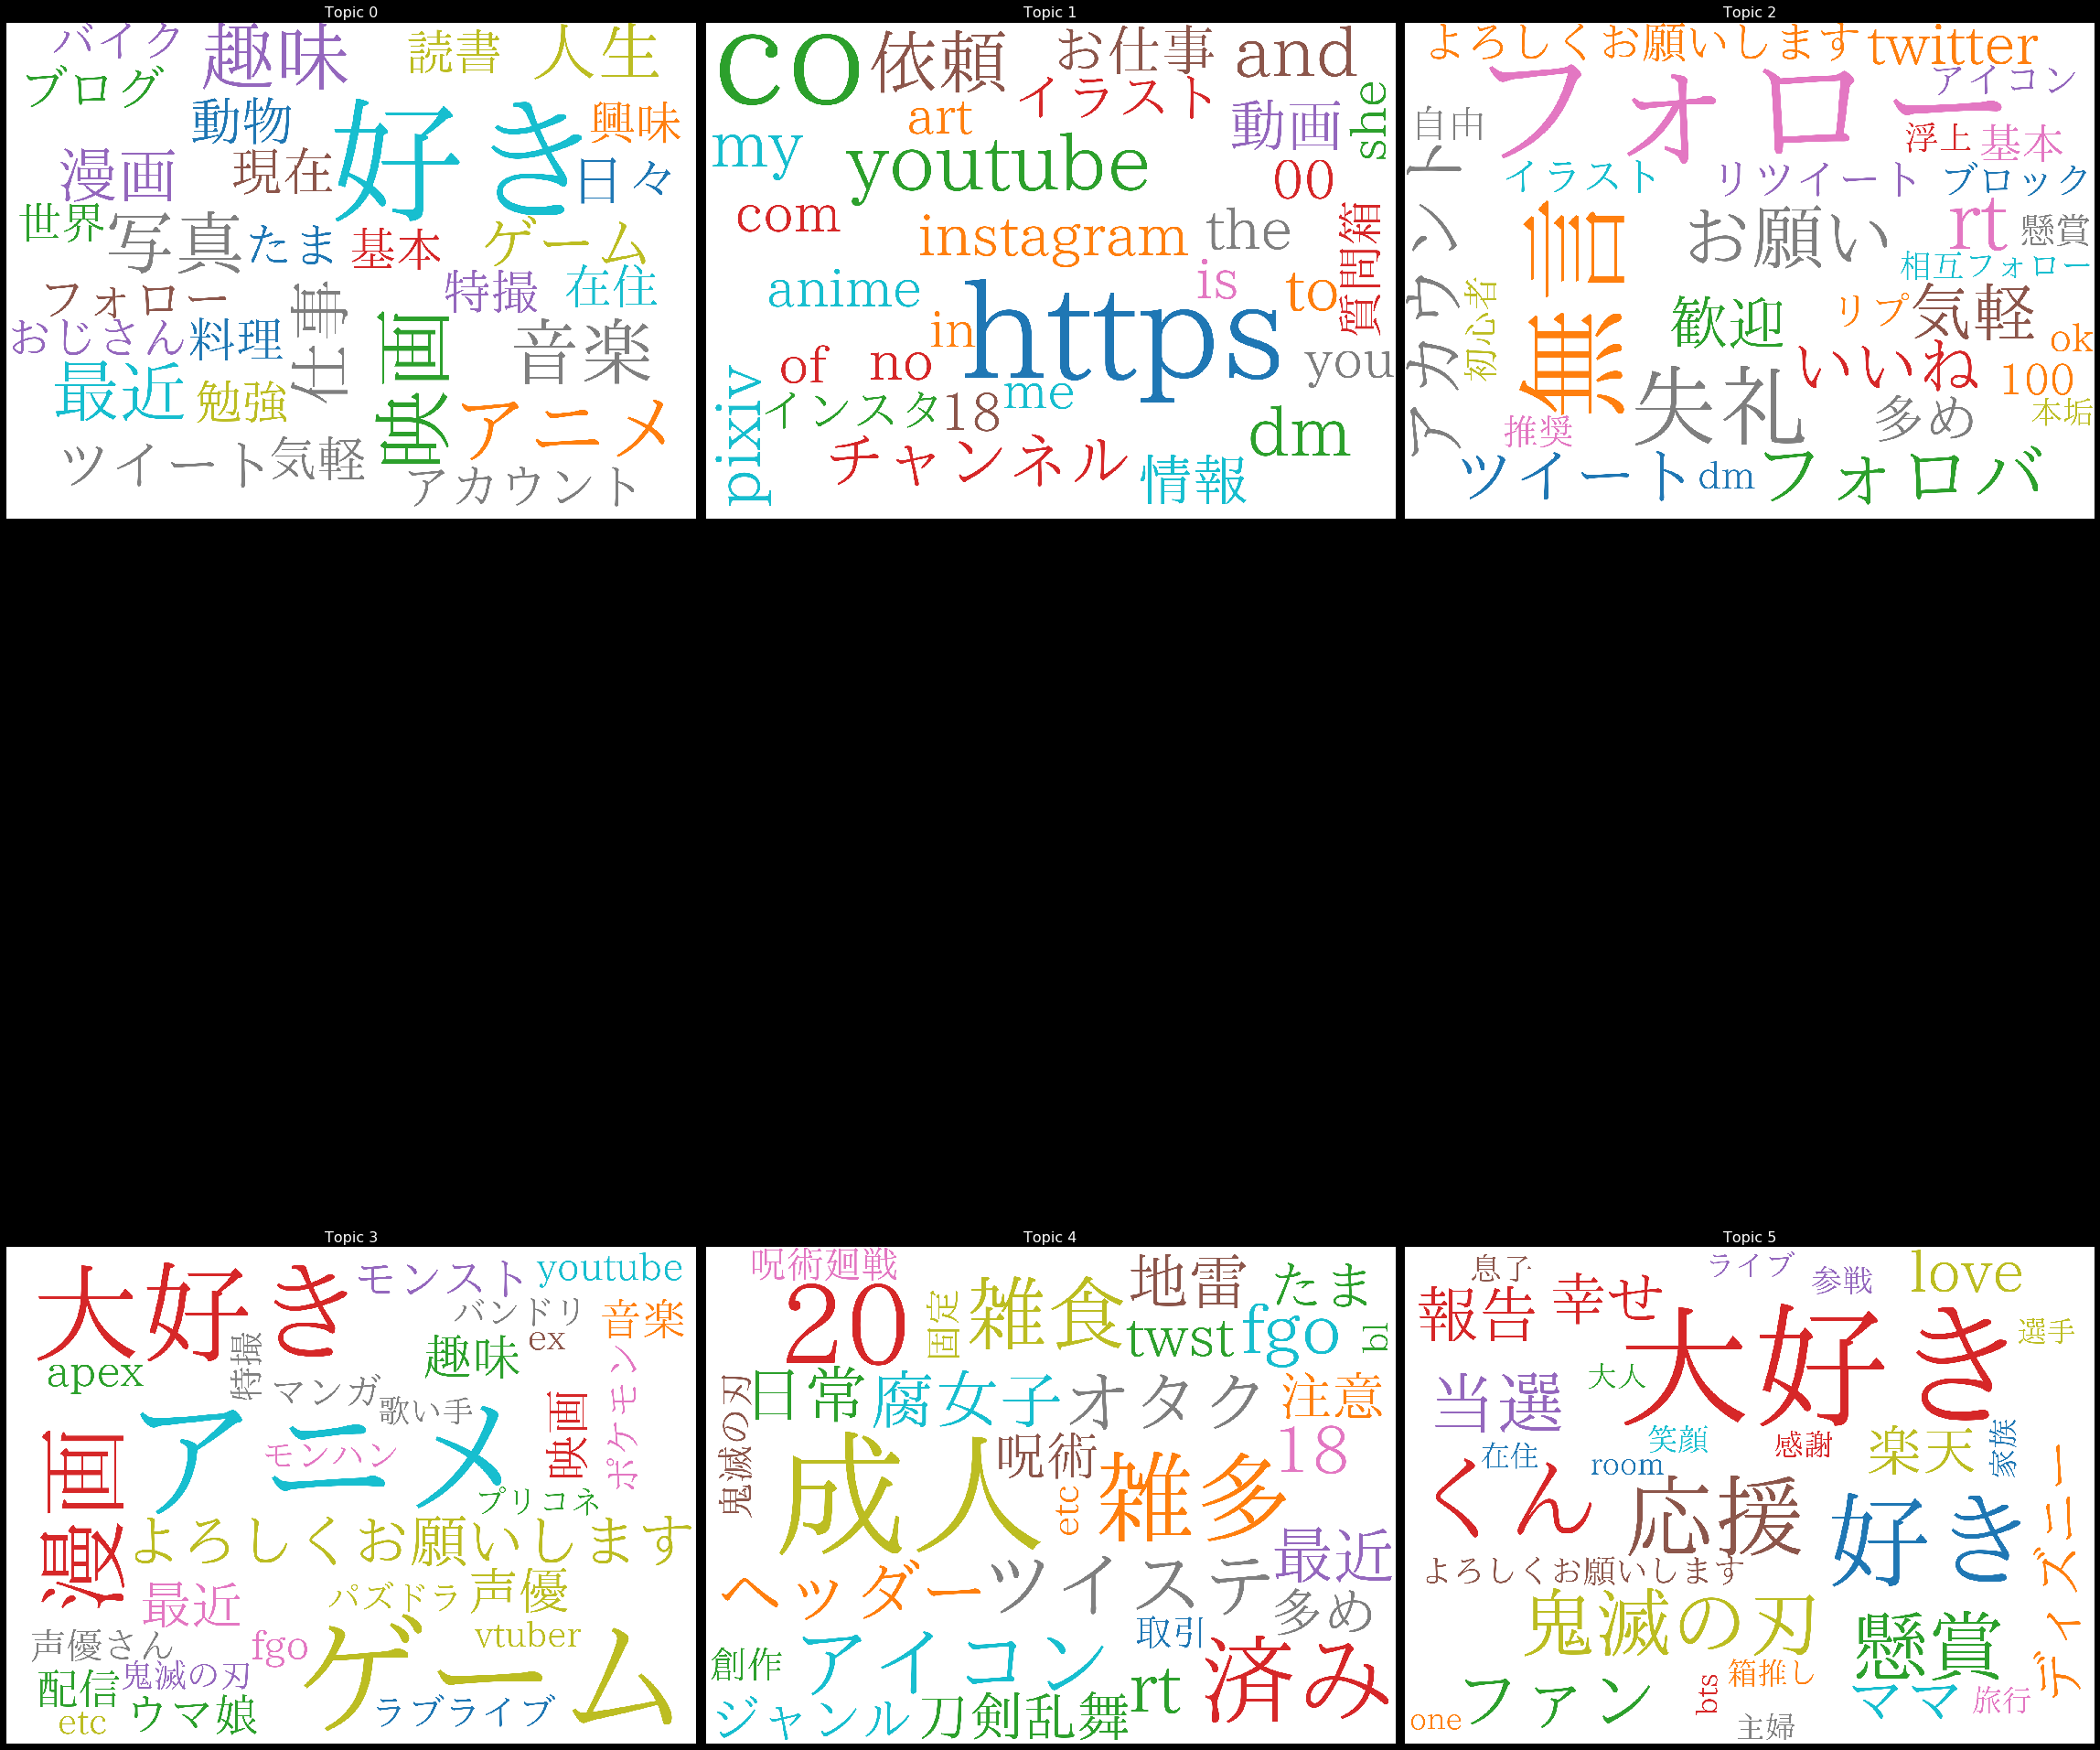

In [43]:
# fig, axes = plt.subplots(10, 2, figsize=(32, 50), sharex=True, sharey=True)
tate = math.ceil(n_components / 3)
fig, axes = plt.subplots(tate, 3, figsize=(32, 50), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    
  if i > len(topic_words)-1:
    break
  fig.add_subplot(ax)
  cloud.generate_from_frequencies(topic_words[i], max_font_size=500)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()

## 11-04 LDA„Åß„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫

### LDA„Å´„Çà„Çã„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫„ÅÆÂÆüË°å

In [44]:
lda = LatentDirichletAllocation(n_components=n_components, 
                                max_iter=20,
                                topic_word_prior=0.01,
                                learning_method='online',
                                learning_offset=50,
                                batch_size=200,
                                mean_change_tol=1e-4,
                                random_state=1,
                                evaluate_every=1,
                                verbose=1)

In [45]:
print((f"Fitting LDA models with tf features, "
  f"n_samples={n_samples} and n_features={n_features}"))
t0 = time()
lda.fit(X)
print(f"done in {time() - t0:0.3f}s.")

Fitting LDA models with tf features, n_samples=88481 and n_features=13363
iteration: 1 of max_iter: 20, perplexity: 6692.4215
iteration: 2 of max_iter: 20, perplexity: 6512.5604
iteration: 3 of max_iter: 20, perplexity: 6460.0357
iteration: 4 of max_iter: 20, perplexity: 6436.6653
iteration: 5 of max_iter: 20, perplexity: 6422.9770
iteration: 6 of max_iter: 20, perplexity: 6414.6399
iteration: 7 of max_iter: 20, perplexity: 6408.9167
iteration: 8 of max_iter: 20, perplexity: 6404.9163
iteration: 9 of max_iter: 20, perplexity: 6401.9039
iteration: 10 of max_iter: 20, perplexity: 6399.5434
iteration: 11 of max_iter: 20, perplexity: 6397.6518
iteration: 12 of max_iter: 20, perplexity: 6396.0082
iteration: 13 of max_iter: 20, perplexity: 6394.6726
iteration: 14 of max_iter: 20, perplexity: 6393.5925
iteration: 15 of max_iter: 20, perplexity: 6392.6700
iteration: 16 of max_iter: 20, perplexity: 6391.9034
iteration: 17 of max_iter: 20, perplexity: 6391.2610
iteration: 18 of max_iter: 20, per

### LDA„ÅÆÂêÑ„Éà„Éî„ÉÉ„ÇØ„Åã„ÇâÈ´òÁ¢∫ÁéáË™û„ÇíÂèñ„ÇäÂá∫„Åô

In [46]:
top_words, weights = get_top_words(lda, vectorizer.get_feature_names())

In [47]:
print(top_words[0])

['Â•Ω„Åç', '„Ç¢„Éã„É°', 'Â§ßÂ•Ω„Åç', '„Ç≤„Éº„É†', 'Êº´Áîª', 'Ë∂£Âë≥', 'Êò†Áîª', 'ÊúÄËøë', 'Èü≥Ê•Ω', 'Â£∞ÂÑ™', 'Êá∏Ë≥û', '„Çà„Çç„Åó„Åè„ÅäÈ°ò„ÅÑ„Åó„Åæ„Åô', 'fgo', '‰ªï‰∫ã', 'ÁâπÊíÆ', 'ÂΩìÈÅ∏', 'È¨ºÊªÖ„ÅÆÂàÉ', 'etc', '„Ç™„Çø„ÇØ', '„Éù„Ç±„É¢„É≥', '„Ç¶„ÉûÂ®ò', 'Â†±Âëä', '„Éû„É≥„Ç¨', '„É¢„É≥„Çπ„Éà', 'ÊóÖË°å', 'ÊñôÁêÜ', 'lisa', 'Á§æ‰ºö‰∫∫', 'Â£∞ÂÑ™„Åï„Çì', 'ÂãïÁâ©']


In [48]:
topic_words = [dict(zip(top_words[i], weights[i])) for i in range(n_components)]

### È´òÁ¢∫ÁéáË™û„Çí„ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÅßÂèØË¶ñÂåñ

In [54]:
cloud = WordCloud(stopwords=STOPWORDS,
                                font_path=FONT_PATH,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10'
                  )

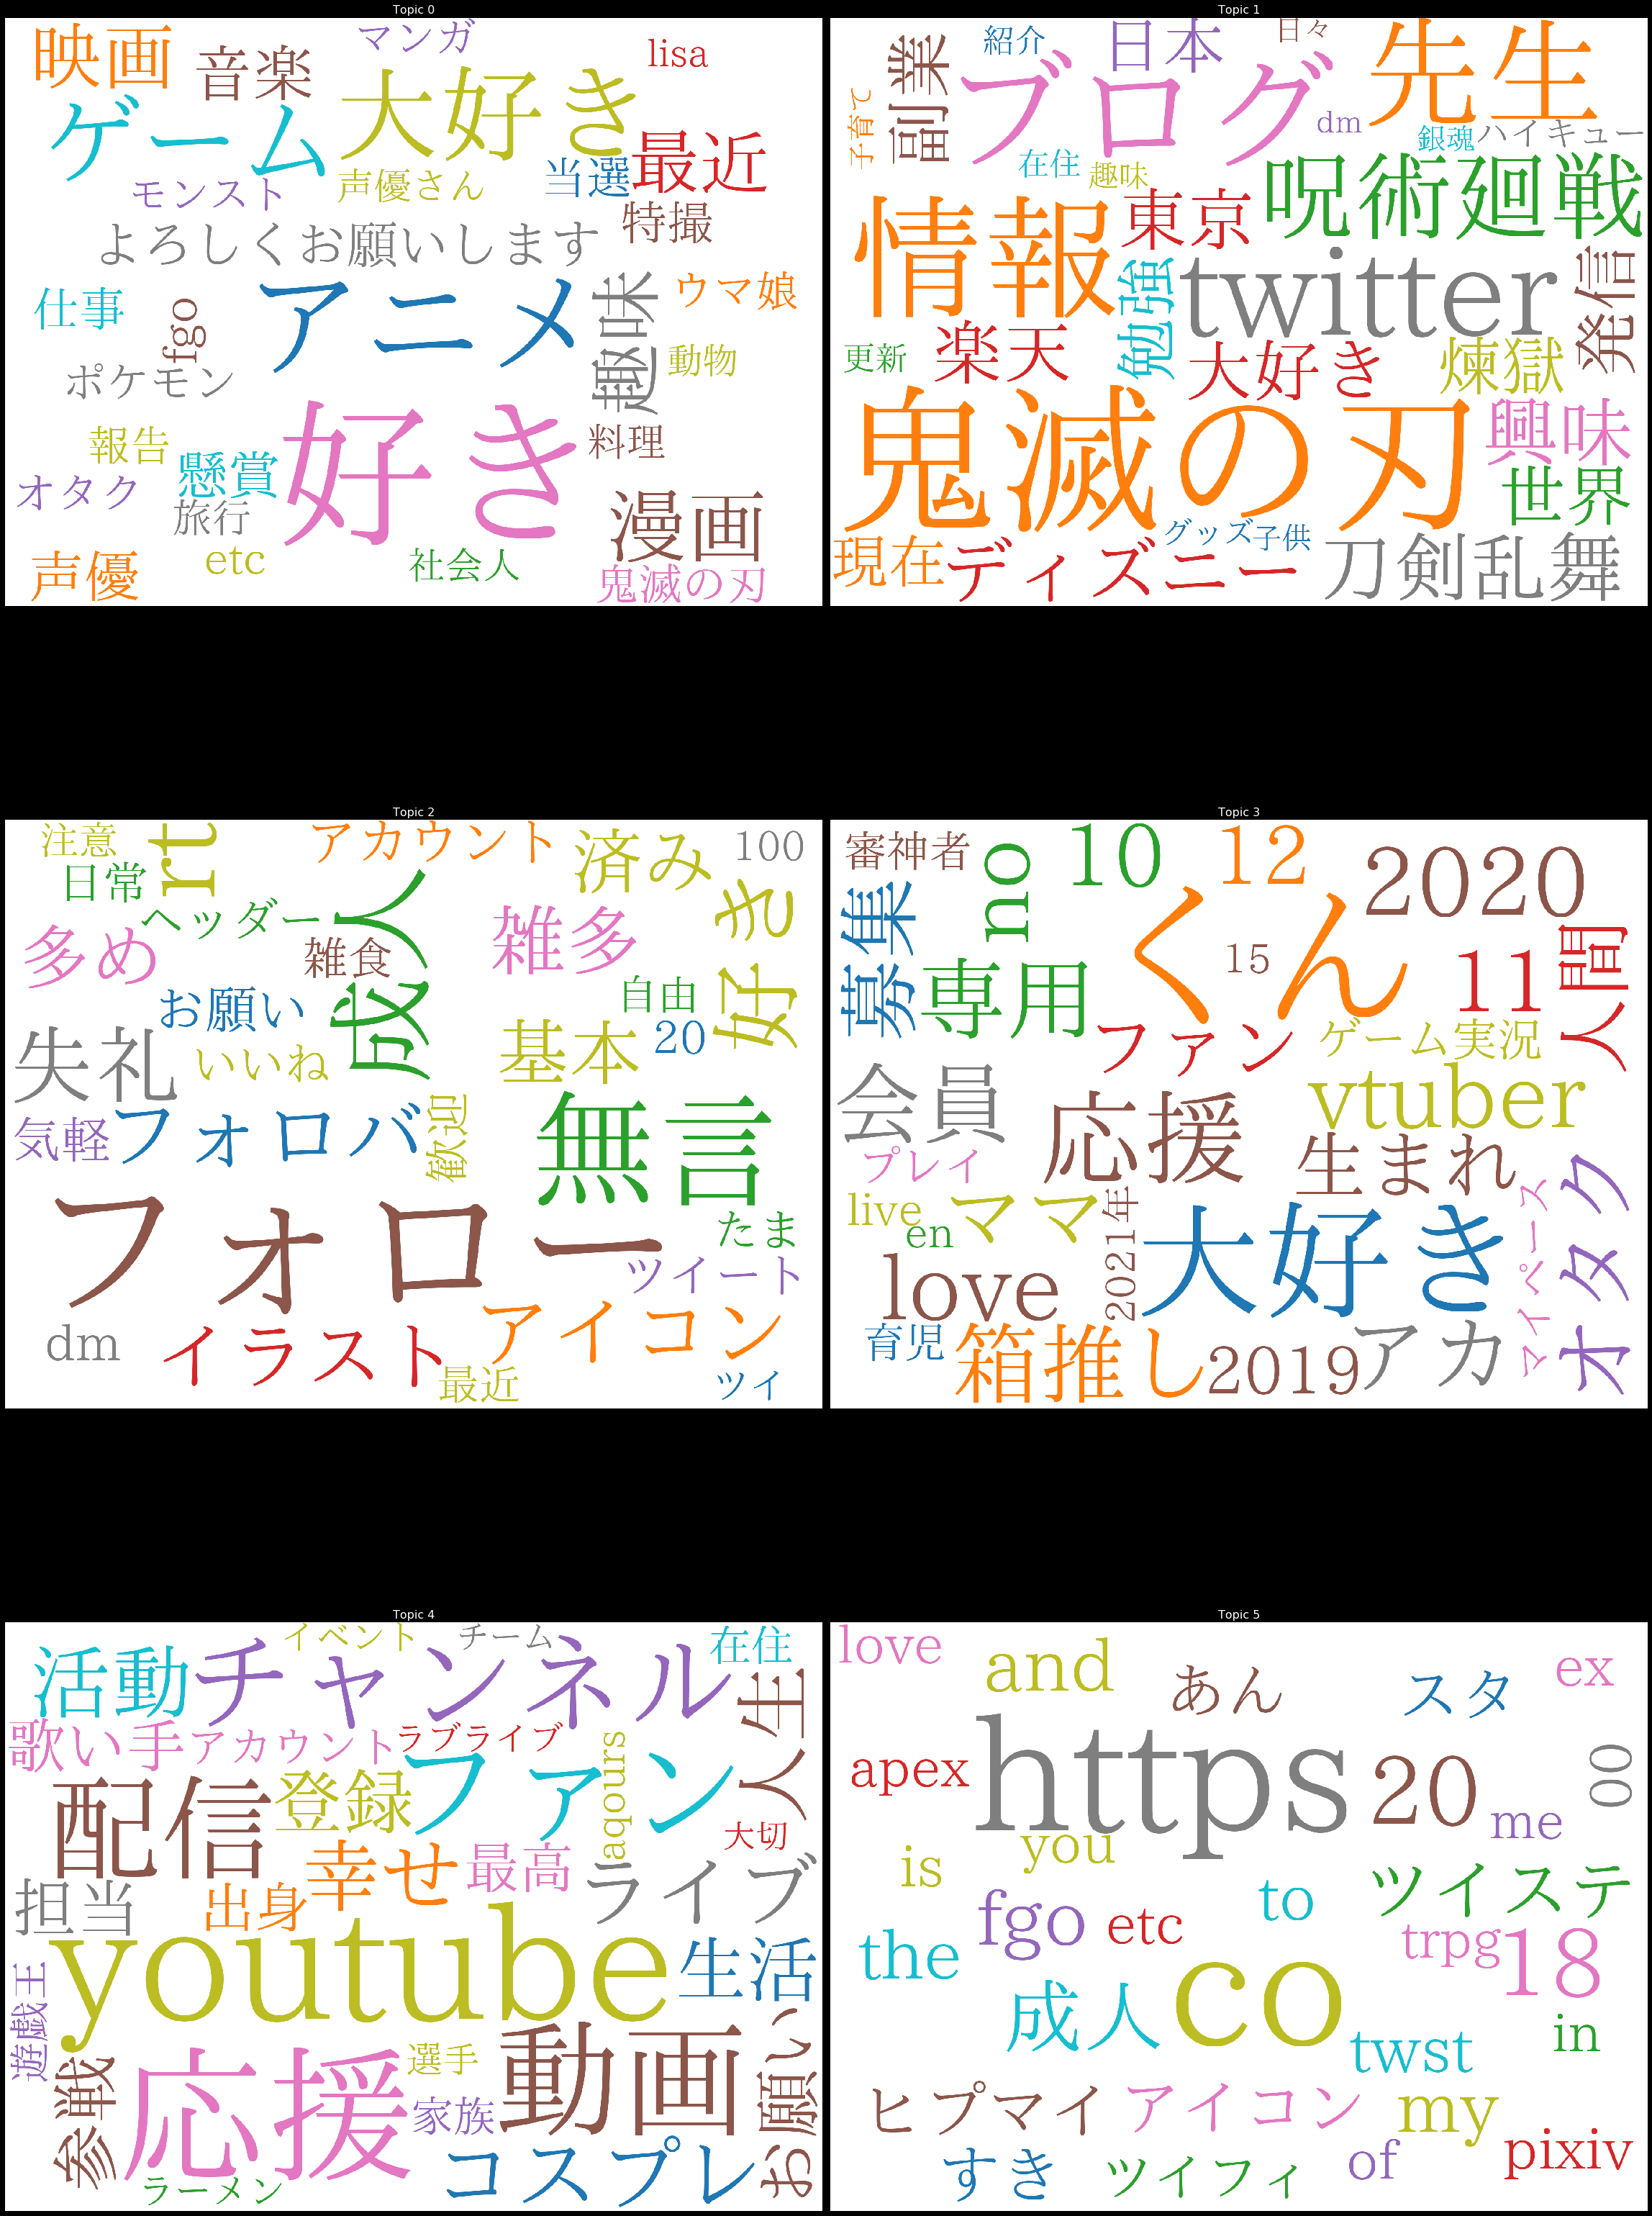

In [55]:
# fig, axes = plt.subplots(5, 4, figsize=(16, 25), sharex=True, sharey=True)
tate = math.ceil(n_components / 2)
fig, axes = plt.subplots(tate, 2, figsize=(32, 50), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    
  if i > len(topic_words)-1:
    break

  fig.add_subplot(ax)
  cloud.generate_from_frequencies(topic_words[i], max_font_size=500)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()


from matplotlib.backends.backend_pdf import PdfPages

import datetime
pdf = PdfPages( 
(datetime.datetime.now() + datetime.timedelta(hours=9) ) .strftime('%m%d_%H%M') + 'topic.pdf')


fignums = plt.get_fignums()
for fignum in fignums:
    plt.figure(fignum)
    pdf.savefig()

pdf.close()

In [52]:
import pyLDAvis
import pyLDAvis.sklearn

In [53]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, X, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2       1.465019 -47.625065       1        1  23.803202
0      54.854797 -36.476795       2        1  22.710899
5      32.212929 -61.444572       3        1  14.293022
1       5.111096 -14.110332       4        1  14.135027
4      26.350170 -33.374702       5        1  13.299886
3      38.109818  -7.222781       6        1  11.757964, topic_info=       Term          Freq         Total Category  logprob  loglift
9223     Â•Ω„Åç  25650.000000  25650.000000  Default  30.0000  30.0000
1082     co  10866.000000  10866.000000  Default  29.0000  29.0000
1722  https  10654.000000  10654.000000  Default  28.0000  28.0000
6587   „Éï„Ç©„É≠„Éº  14379.000000  14379.000000  Default  27.0000  27.0000
4664    „Ç¢„Éã„É°  10008.000000  10008.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
7933     ‰∫∫Èñì    593.088847    870.327390   Topic6  -5.2564   1.7571
9849     ÂøúÊè¥   1061.495369   2823.562096   Topic6  -4.6743   1.1623
9090    Â§ßÂ•Ω„Åç   1797.314809  11445.388558   Topic6  -4.1477   0.2893
4941    „Ç™„Çø„ÇØ    765.033236   1940.605058   Topic6  -5.0019   1.2098
6547    „Éï„Ç°„É≥    552.896204   1881.784469   Topic6  -5.3266   0.9158

[303 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
0          3  1.000423    00
5          5  1.000161    01
33         5  0.251457    10
33         6  0.748953    10
34         1  0.944426   100
...      ...       ...   ...
12986      5  0.133857    Èü≥Ê•Ω
13128      1  0.057211  È¨ºÊªÖ„ÅÆÂàÉ
13128      2  0.362334  È¨ºÊªÖ„ÅÆÂàÉ
13128      4  0.580411  È¨ºÊªÖ„ÅÆÂàÉ
13173      5  0.997973    È∫ªÈõÄ

[368 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 6, 2, 5, 4])